# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here. Need to write at least 3 observations or inferences from the data
 

In [49]:
# Data Science Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling Libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
# Add Data Files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
comb_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
comb_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Check number of mice
comb_df["Mouse ID"].nunique()

249

In [52]:
# Find the duplicate mouse by ID number and Timepoint
comb_df[comb_df.duplicated(["Mouse ID", "Timepoint"])] # Got this from: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by removing the duplicate mouse (by its ID)
filt = comb_df["Mouse ID"] != "g989" # Making a filter so all mice that don't have the Mouse ID g989 will be kept
df = comb_df[filt]

In [54]:
# Number of mice in clean DataFrame
df["Mouse ID"].nunique()

248

# Summary Statistics
- Only need to use 1 of the methods (per the Rubric, just need to get the summary statistics via groupby and that a new dataframe is created)

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby Drug Regimen and find Mean, Median, Variance, Std. Dev. and Standard Error for the Tumor Volume
tum_mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tum_med = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tum_var = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tum_stdv = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tum_sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

data = {
    "Mean Tumor Volume": tum_mean,
    "Median Tumor Volume": tum_med,
    "Tumor Volume Variance": tum_var,
    "Tumor Volume Std. Dev.": tum_stdv,
    "Tumor Volume Std. Err.": tum_sem
}

summary_statistics = pd.DataFrame(data)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: title={'center': 'Observed Mouse Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

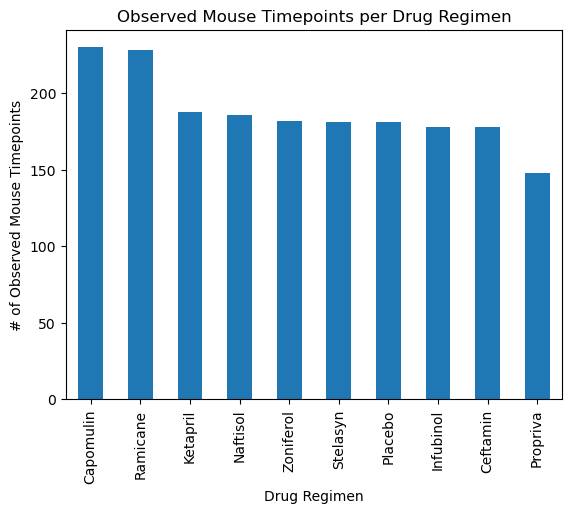

In [122]:
# Pandas bar chart
# Because we need to get a count of each row, making a bar chart of the value counts per each Drug Regimen is best
df["Drug Regimen"].value_counts().plot(kind="bar", ylabel="# of Observed Mouse Timepoints", title="Observed Mouse Timepoints per Drug Regimen")

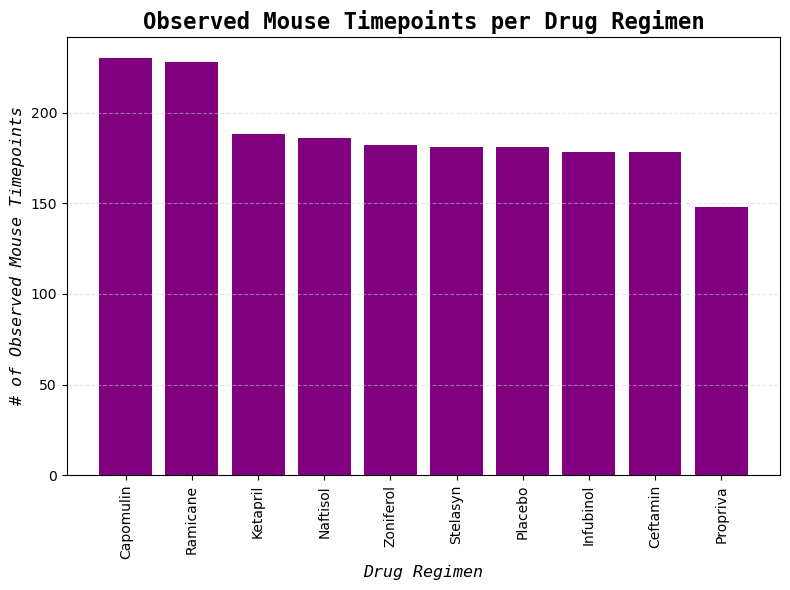

In [123]:
# Pyplot bar chart
# Step 1: Get the data
# Turn Value Counts into a DataFrame to be graphed
df1 = pd.DataFrame(df["Drug Regimen"].value_counts())
x = df1.index
y = df1["count"]
		
# Step 2: Create the Canvas
plt.figure(figsize=(8, 6))

# Step 3: Create Simple Graph
plt.bar(x, y, color = "purple")

# Step 4: Customization
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic", fontfamily="monospace")
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12, fontstyle="italic", fontfamily="monospace")
plt.title("Observed Mouse Timepoints per Drug Regimen", fontsize=16, fontweight="bold", fontfamily="monospace")
plt.xticks(rotation=90)

plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5) # alpha is opacity

# Step 5: Show/Save the graph
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

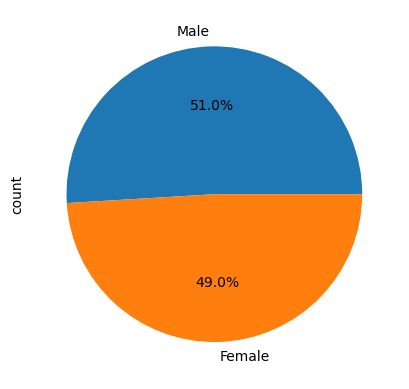

In [120]:
# Pandas pie chart; male vs. female mice
df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")

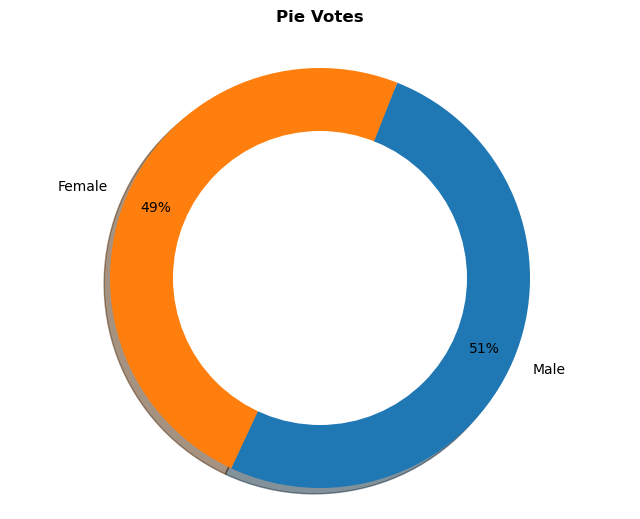

In [129]:
# Pyplot bar chart
# Donut
# Step 1: Get the data
labels =["Male", "Female"]
sex =  df["Sex"].value_counts()

# Step 2: Make the canvas
plt.figure(figsize=(8,6))

# Step 3: Make the barebones plot; 
plt.pie(sex, labels=labels, autopct="%1.lf%%", shadow=True, startangle=245, pctdistance=0.85)

# Step 3.5: Add in the donut hole
# Create the circle
center_circle = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()

# Adding Circle in Pie Chart
fig.gca().add_artist(center_circle)

# Step 4: Customization
plt.title("Pie Votes\n", fontweight="bold")
plt.axis("equal") # Centers it

# Step 5: 
plt.show()

# Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [ ]:
# Box plot that shows the distribution of the tumor volume for each treatment group (can be any method--just use seaborn)

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Use linregress for this